In [1]:
from __future__ import print_function

"""
A script to run cqed_rhf method on the formaldehyde coupled to a photon with 
different polarizations and coupling magnitude |\lambda| = 0.2 atomic units
to produce data from Table I of McTague and Foley 
"""

__authors__   = ["Jon McTague", "Jonathan Foley"]
__credits__   = ["Jon McTague", "Jonathan Foley"]

__copyright_amp__ = "(c) 2014-2018, The Psi4NumPy Developers"
__license__   = "BSD-3-Clause"
__date__      = "2021-01-15"

# ==> Import Psi4, NumPy, & SciPy <==
import psi4
import numpy as np
from helper_cqed_rhf import *
from helper_ciss_prism import *
from matplotlib import pyplot as plt

# Set Psi4 & NumPy Memory Options
psi4.set_memory('2 GB')
psi4.core.set_output_file('output.dat', False)

numpy_memory = 2

In [2]:
# rhf/cc-pVDZ optimized geometry of formaldehyde
molstr = """

0 1
O 0.0000000000 0.0000000000 5.91268220e-01
C 0.0000000000 0.0000000000 -5.90400099e-01
H 0.0000000000 9.32184336e-01 -1.17703144e+00
H 0.0000000000 -9.32184336e-01 -1.17703144e+00
no_reorient
symmetry c1
"""

# options dict
options_dict = {'basis': 'cc-pVDZ',
               'save_jk': True, 
               'scf_type': 'pk',
               'e_convergence' : 1e-8,
               'd_convergence' : 1e-7}



In [3]:
# set cavity parameters
om = 0.3780197
lam = np.array([0, 0, 0.00])

# cqed-rhf
#cqed_rhf_dict = cqed_rhf(lam, molstr, options_dict)

# cqed-cis
cqed_cis_dict = cs_cqed_cis(lam, om, molstr, options_dict)


Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2835960115897649
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -113.8772221766176642   dE = -1.13877E+02   dRMS = 1.33660E-08
SCF Iteration   2: Energy = -113.8772221766176926   dE = -2.84217E-14   dRMS = 5.01791E-09
Total time for SCF iterations: 0.022 seconds 

QED-RHF   energy: -113.87722218 hartree
Psi4  SCF energy: -113.87722218 hartree


In [5]:
scf_e = cqed_cis_dict["RHF ENERGY"]
cqed_scf_e = cqed_cis_dict["CQED-RHF ENERGY"]

ciss_pf_e = cqed_cis_dict["CISS-PF ENERGY"]
ciss_jc_e = cqed_cis_dict["CISS-JC ENERGY"]
cis_pf_e = cqed_cis_dict["CIS-PF ENERGY"]
cis_jc_e = cqed_cis_dict["CIS-JC ENERGY"]


print(ciss_pf_e[1:8])
print(ciss_jc_e[1:8])
print(cis_pf_e[0:7])
print(cis_jc_e[0:7])


[0.17370758 0.3780197  0.3780197  0.38038077 0.38795244 0.43760538
 0.47316562]
[0.17370758 0.3780197  0.3780197  0.38038077 0.38795244 0.43760538
 0.47316562]
[0.17370758 0.3780197  0.3780197  0.38038077 0.38795244 0.43760538
 0.47316562]
[0.17370758 0.3780197  0.3780197  0.38038077 0.38795244 0.43760538
 0.47316562]


In [6]:
lam_z = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

In [7]:

ciss_pf = np.zeros((5,len(lam_z)))
ciss_jc = np.zeros((5,len(lam_z)))
cis_pf = np.zeros((5,len(lam_z)))
cis_jc = np.zeros((5,len(lam_z)))

# lambda vector
#lam = np.array([0,0,lam_z])

# loop over the different bond-lengths, create different instances
# of MgH+ molecule and compute and store various quantities
ctr = 0
for l in lam_z:
    lam = np.array([0, 0, l])
    
    cqed_cis_dict = cs_cqed_cis(lam, om, molstr, options_dict)
    # get cqed_scf_e
    cqed_scf_e = cqed_cis_dict["CQED-RHF ENERGY"]
    
    # get eigenvalues from CISS-PF
    ciss_pf_e = cqed_cis_dict["CISS-PF ENERGY"]
    # get eigenvalues from CISS-JC
    ciss_jc_e = cqed_cis_dict["CISS-JC ENERGY"]
    # get eigenvalues from CIS-PF
    cis_pf_e = cqed_cis_dict["CIS-PF ENERGY"]
    # get eigenvalues from CIS-JC
    cis_jc_e = cqed_cis_dict["CIS-JC ENERGY"]
    

    
    ciss_pf[:5,ctr] = cqed_scf_e+ciss_pf_e[:5]
    ciss_jc[:5,ctr] = cqed_scf_e+ciss_jc_e[:5]
    
    cis_pf[0,ctr] = cqed_scf_e
    cis_jc[0,ctr] = cqed_scf_e

    cis_pf[1:5,ctr] = cqed_scf_e + cis_pf_e[0:4]
    cis_jc[1:5,ctr] = cqed_scf_e + cis_jc_e[0:4]
    ctr += 1
    
    


Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2835960115897649
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -113.8772221766176642   dE = -1.13877E+02   dRMS = 1.33660E-08
SCF Iteration   2: Energy = -113.8772221766176926   dE = -2.84217E-14   dRMS = 5.01791E-09
Total time for SCF iterations: 0.021 seconds 

QED-RHF   energy: -113.87722218 hartree
Psi4  SCF energy: -113.87722218 hartree

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2819435786474287
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000713117764573
SCF Iteration   1: Energy = -113.8768027059861367   dE = -1.13877E+02   dRMS = 5.42814E-06
SCF Iteration   2: Energy = -113.8768027458009158   dE = -3.98148E-08   dRMS = 2.76655E-06
SCF Ite

SCF Iteration  19: Energy = -113.8705221195212545   dE = -6.55263E-11   dRMS = 4.42530E-07
SCF Iteration  20: Energy = -113.8705221195608317   dE = -3.95772E-11   dRMS = 3.44228E-07
SCF Iteration  21: Energy = -113.8705221195849617   dE = -2.41300E-11   dRMS = 2.67653E-07
SCF Iteration  22: Energy = -113.8705221195992863   dE = -1.43245E-11   dRMS = 2.08174E-07
SCF Iteration  23: Energy = -113.8705221196081965   dE = -8.91021E-12   dRMS = 1.61878E-07
SCF Iteration  24: Energy = -113.8705221196133408   dE = -5.14433E-12   dRMS = 1.25897E-07
SCF Iteration  25: Energy = -113.8705221196168651   dE = -3.52429E-12   dRMS = 9.79028E-08
Total time for SCF iterations: 0.284 seconds 

QED-RHF   energy: -113.87052212 hartree
Psi4  SCF energy: -113.87722218 hartree

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2422851880308201
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.00

SCF Iteration  19: Energy = -113.8567739616005383   dE = -4.78735E-10   dRMS = 1.17077E-06
SCF Iteration  20: Energy = -113.8567739618852102   dE = -2.84672E-10   dRMS = 9.03252E-07
SCF Iteration  21: Energy = -113.8567739620543762   dE = -1.69166E-10   dRMS = 6.96437E-07
SCF Iteration  22: Energy = -113.8567739621549606   dE = -1.00584E-10   dRMS = 5.37216E-07
SCF Iteration  23: Energy = -113.8567739622151294   dE = -6.01688E-11   dRMS = 4.14261E-07
SCF Iteration  24: Energy = -113.8567739622507133   dE = -3.55840E-11   dRMS = 3.19524E-07
SCF Iteration  25: Energy = -113.8567739622718591   dE = -2.11458E-11   dRMS = 2.46409E-07
SCF Iteration  26: Energy = -113.8567739622846346   dE = -1.27756E-11   dRMS = 1.90049E-07
SCF Iteration  27: Energy = -113.8567739622919106   dE = -7.27596E-12   dRMS = 1.46566E-07
SCF Iteration  28: Energy = -113.8567739622962591   dE = -4.34852E-12   dRMS = 1.13040E-07
SCF Iteration  29: Energy = -113.8567739622991439   dE = -2.88480E-12   dRMS = 8.71778E-08

SCF Iteration  20: Energy = -113.8357055543626188   dE = -7.88489E-10   dRMS = 1.45919E-06
SCF Iteration  21: Energy = -113.8357055548200378   dE = -4.57419E-10   dRMS = 1.11079E-06
SCF Iteration  22: Energy = -113.8357055550850987   dE = -2.65061E-10   dRMS = 8.46243E-07
SCF Iteration  23: Energy = -113.8357055552391728   dE = -1.54074E-10   dRMS = 6.44320E-07
SCF Iteration  24: Energy = -113.8357055553283459   dE = -8.91731E-11   dRMS = 4.90796E-07
SCF Iteration  25: Energy = -113.8357055553800308   dE = -5.16849E-11   dRMS = 3.73728E-07
SCF Iteration  26: Energy = -113.8357055554100583   dE = -3.00275E-11   dRMS = 2.84655E-07
SCF Iteration  27: Energy = -113.8357055554275661   dE = -1.75078E-11   dRMS = 2.16771E-07
SCF Iteration  28: Energy = -113.8357055554375847   dE = -1.00187E-11   dRMS = 1.65099E-07
SCF Iteration  29: Energy = -113.8357055554435249   dE = -5.94014E-12   dRMS = 1.25731E-07
SCF Iteration  30: Energy = -113.8357055554468360   dE = -3.31113E-12   dRMS = 9.57574E-08

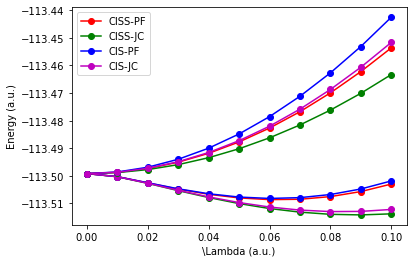

In [13]:
from matplotlib import pyplot as plt

plt.plot(lam_z, ciss_pf[2,:], 'r-o', label='CISS-PF')
plt.plot(lam_z, ciss_jc[2,:], 'g-o', label='CISS-JC')
plt.plot(lam_z, cis_pf[2,:], 'b-o', label='CIS-PF')
plt.plot(lam_z, cis_jc[2,:], 'm-o', label='CIS-JC')
plt.plot(lam_z, ciss_pf[3,:], 'r-o')
plt.plot(lam_z, ciss_jc[3,:], 'g-o')
plt.plot(lam_z, cis_pf[3,:], 'b-o')
plt.plot(lam_z, cis_jc[3,:], 'm-o')

plt.xlabel("\Lambda (a.u.)")
plt.ylabel("Energy (a.u.)")
plt.legend()
plt.savefig("Compare_Prism.png")
plt.show()